In [3]:
# Import packages
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt


## Based on KMean clustering -  Unsupervised algorithm , segment given income date based on geographical location , high/low income group categories

In [6]:
# Import dataset
df = pd.read_csv("C:\dataset\ML\income.csv")
df.head()


,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [5]:
df.shape

(22, 3)

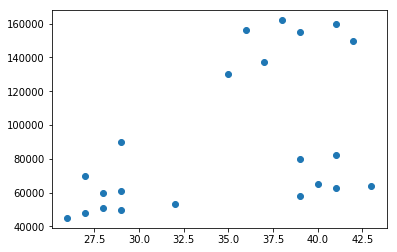

In [7]:
# EDA- SCatter plot
plt.scatter(df.Age,df.Income)

In [11]:
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
y_Predicted = km.fit_predict(df[['Age',"Income"]])
y_Predicted

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2])

## KMean cluster algo. with 3 clusters applied on Dataset for Age , Income features
# it computed the 3 clusters and predicted the output(0,1,2) 

In [18]:
df['Cluster']= y_Predicted

#df.drop('CLuster' ,axis=1, inplace=True)
df.head()

,Name,Age,Income,Cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


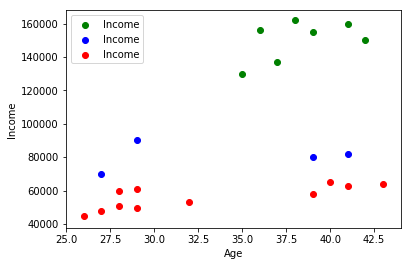

In [25]:
df1= df[df.Cluster==0]   # Return dataset with only cluster 0 set
df2= df[df.Cluster==1]
df3= df[df.Cluster==2]

plt.scatter(df1.Age,df1.Income,color = 'green')
plt.scatter(df2.Age,df2.Income,color = 'blue')
plt.scatter(df3.Age,df3.Income,color = 'red')

plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()

In [ ]:
# Based on above scatter plot, i can conclude that all 3 clusters 
#are not grouped as req. This is due to scale range of X-axis, Y- axis are not
# in same range.

# Lets rescale both x-axis and try gain how our model works


In [36]:
df.head()

,Name,Age,Income,Cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


In [40]:
# Minmaxsscaler (Preprocessing) for Age, Salary group

M = MinMaxScaler()
M .fit(df[['Income']])
df['Income']= M.transform(df[['Income']])

M.fit(df[['Age']])
df.Age=M.transform(df[['Age']])
df
 
   

,Name,Age,Income,Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [ ]:
#  Now both Age , Salary scale were range in (0 -1)


In [43]:
# Again run KMean clustering algo
km= KMeans(n_clusters=3)
y_predict=km.fit_predict(df[['Age',"Income"]])
y_predict

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [50]:
df['cluster1']= y_predict
df.drop('cluster',axis=1,inplace=True)
df.head()

,Name,Age,Income,cluster1
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [53]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

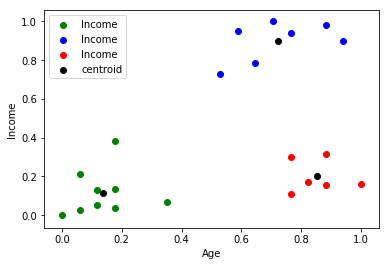

In [57]:
df1= df[df.cluster1==0]   # Return dataset with only cluster 0 set
df2= df[df.cluster1==1]
df3= df[df.cluster1==2]

plt.scatter(df1.Age,df1.Income,color = 'green')
plt.scatter(df2.Age,df2.Income,color = 'blue')
plt.scatter(df3.Age,df3.Income,color = 'red')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',
           label='centroid')

plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()

## # Elbow plot method - Used to find number of 'K' to find clusters

In [58]:
k_rng= range(1,10)   # In range of 1- 10 
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income']])
    sse.append(km.inertia_)         # kMean algorithm hold interia parameter - which will have SSE value(SSE- Sum of Square Error) 
                                    #which help to identify 'K' number

In [59]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.36250799007973283,
 0.2621792762345213,
 0.22395807059250122,
 0.16869711728567782,
 0.14072448985352304,
 0.10188787724979426]

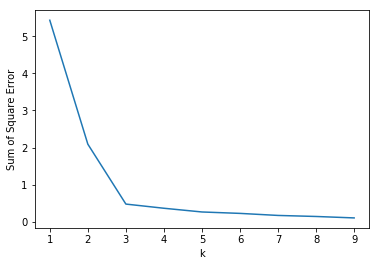

In [60]:
# plot graph (K, SSE)
plt.xlabel('k')
plt.ylabel('Sum of Square Error')
plt.plot(k_rng,sse)

In [ ]:
# Based on Elbow method, Best optimal K value is '3', were SSE value also low 
# There are 3 cluster , best possible for this dataset